<a href="https://colab.research.google.com/github/anushasanka33/Ticket_verification_LR/blob/main/minor1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [ ]:
data=pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.shape

(891, 12)

<AxesSubplot:xlabel='Survived', ylabel='count'>

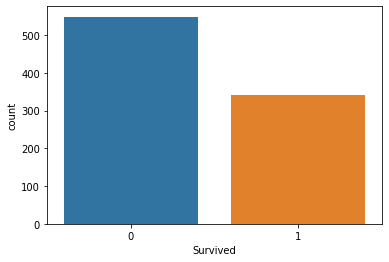

In [ ]:
from msilib import datasizemask


sns.countplot(x='Survived',data=data)

<AxesSubplot:xlabel='Survived', ylabel='count'>

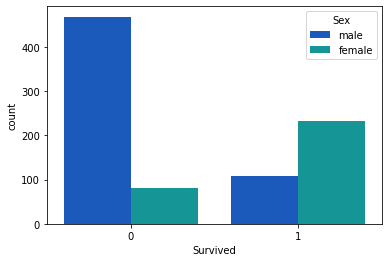

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=data, palette='winter')

<AxesSubplot:xlabel='Survived', ylabel='count'>

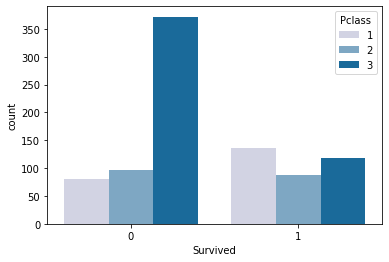

In [ ]:
sns.countplot(x='Survived', hue='Pclass', data=data, palette='PuBu')

In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [ ]:
pd.get_dummies(data['Sex']).head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [ ]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [ ]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [ ]:
embark=pd.get_dummies(data['Embarked'])
embark.head(3)

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1


In [ ]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)
embark.head(3)

,Q,S
0,0,1
1,0,0
2,0,1


In [ ]:
Pcl=pd.get_dummies(data['Pclass'],drop_first=True)
Pcl.head(3)

,2,3
0,0,1
1,0,0
2,0,1


In [ ]:
d=pd.concat([data,sex,embark,Pcl],axis=1)
d.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,1


In [ ]:
d.drop(['Name','PassengerId','Pclass','Ticket','Sex','Cabin','Age','Embarked'],axis=1, inplace=True)
d.head(3)

,Survived,SibSp,Parch,Fare,male,Q,S,2,3
0,0,1,0,7.2500,1,0,1,0,1
1,1,1,0,71.2833,0,0,0,0,0
2,1,0,0,7.9250,0,0,1,0,1


In [ ]:
X=d.drop('Survived',axis=1)
y=d['Survived']

In [ ]:
X

,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,7.2500,1,0,1,0,1
1,1,0,71.2833,0,0,0,0,0
2,0,0,7.9250,0,0,1,0,1
3,1,0,53.1000,0,0,1,0,0
4,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,0,13.0000,1,0,1,1,0
887,0,0,30.0000,0,0,1,0,0
888,1,2,23.4500,0,0,1,0,1
889,0,0,30.0000,1,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.33,random_state=4)

In [ ]:
from sklearn.linear_model import LogisticRegression
lm=LogisticRegression()

In [ ]:
lm.fit(X_train,y_train)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression()

In [ ]:
prediction=lm.predict(X_test)

c:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [ ]:
confusion_matrix(y_test,prediction)

array([[176,  19],
       [ 29,  71]], dtype=int64)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,prediction)

0.8372881355932204